In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import time
from load_data_and_distribution_analisys import split_dataset_v1, plot_confusion_matrix, load_dataset_cleaned

/Users/marcodeano/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/marcodeano/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Altri classificatori testati con applicazione di pca

In questo notebook, viene riproposto l'utilizzo dei modelli KNN e Support Vector Machine (kernel lineare) con l'aggiunta della tecnica PCA (Principal Component Analysis): avendo a che fare con un dataset con 22 feature e avendo gia testato la tecnica della feature selection, ora si vuole valutare se la riduzione della dimensionalità tramite PCA possa migliorare le prestazioni dei modelli.  
Anche per questo notebook non abbiamo riportato tutti i passaggi per selezionare il miglior numero di componenti da passare come parametro alla PCA, ma abbiamo lasciato solamente la versione che ci permetteva di ottenere i migliori risultati.

In [2]:
dataset = load_dataset_cleaned()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2
   sex  age  height  weight  ...  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN
0    1   35     170      75  ...      35.0       40.0               1.0       1
1    1   30     180      80  ...      36.0       27.0               3.0       0
2    1   40     165      75  ...      32.0       68.0               1.0       0
3    1   50     175      80  ...      34.0       18.0               1.0       0
4    1   50     165      60  ...      12.0       25.0               1.0       0

[5 rows x 24 columns]


In [3]:
X_smoke, y_smoke, X_drink, y_drink = split_dataset_v1(dataset)

In [ ]:
pipelines = {
    "svm": Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=0.95)), ("svm", LinearSVC(random_state=42, C=0.1, class_weight="balanced"))]),
    "knn": Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=0.95)), ("knn", KNeighborsClassifier(n_neighbors=500, n_jobs=-1))]),
}

In [11]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_drink, y_drink, test_size=0.2, random_state=42, stratify=y_drink)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=42, stratify=y_smoke)

### Drinking

In [12]:
for name, pipeline in pipelines.items():
    print(f"Training {name}...", end=" ")
    t0 = time.time()

    pipeline.fit(X_train_d, y_train_d)  
    
    print(f"took {time.time() - t0:.2f} seconds")

Training svm... took 0.93 seconds
Training knn... took 0.21 seconds


Classification report per svm:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71     98396
           1       0.72      0.71      0.71     98619

    accuracy                           0.71    197015
   macro avg       0.71      0.71      0.71    197015
weighted avg       0.71      0.71      0.71    197015



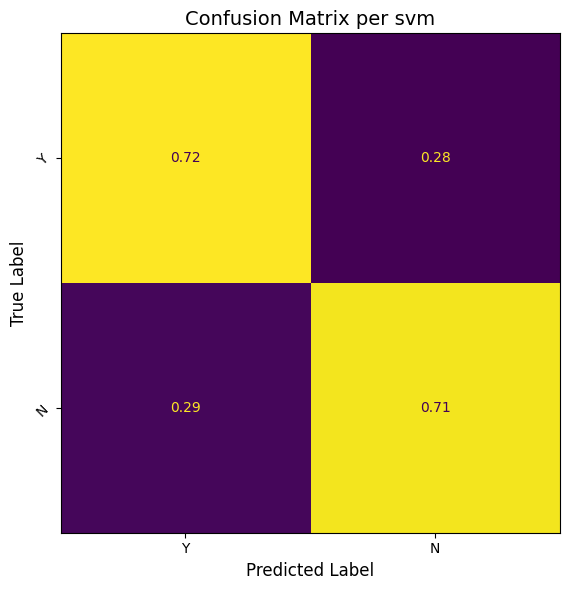

Classification report per knn:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70     98396
           1       0.70      0.75      0.72     98619

    accuracy                           0.71    197015
   macro avg       0.72      0.71      0.71    197015
weighted avg       0.72      0.71      0.71    197015



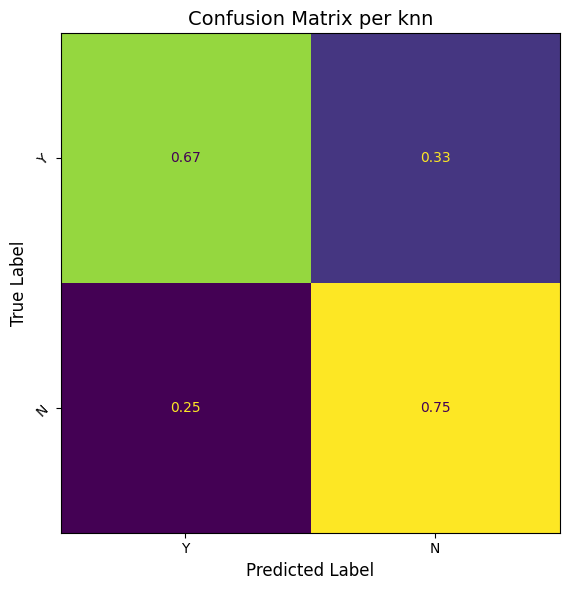

In [13]:
for name, pipeline in pipelines.items():
    y_pred_drink = pipeline.predict(X_test_d)

    report_drink = classification_report(y_test_d, y_pred_drink)

    print(f"Classification report per {name}:")
    print(report_drink)

    plot_confusion_matrix(y_test_d, y_pred_drink, ["Y", "N"], f"Confusion Matrix per {name}")

### Smoking

In [14]:
for name, pipeline in pipelines.items():
    print(f"Training {name}...", end=" ")
    t0 = time.time()

    pipeline.fit(X_train_s, y_train_s)  
    
    print(f"took {time.time() - t0:.2f} seconds")

Training svm... took 3.36 seconds
Training knn... took 0.20 seconds


Classification report per svm:
              precision    recall  f1-score   support

         1.0       0.91      0.75      0.82    119747
         2.0       0.42      0.50      0.46     34738
         3.0       0.47      0.64      0.54     42530

    accuracy                           0.68    197015
   macro avg       0.60      0.63      0.61    197015
weighted avg       0.73      0.68      0.70    197015



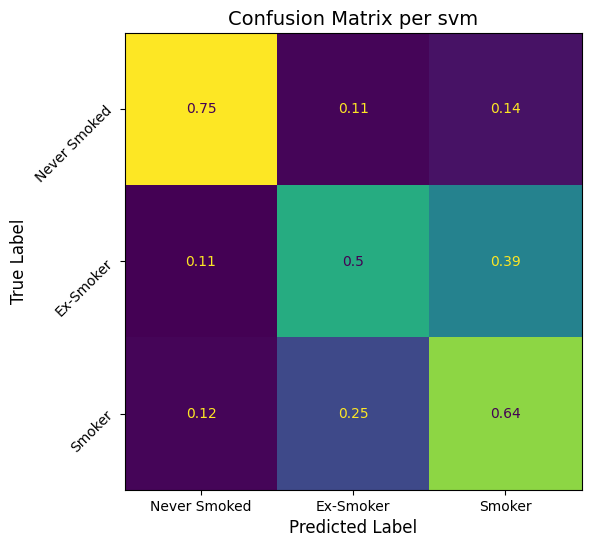

Classification report per knn:
              precision    recall  f1-score   support

         1.0       0.85      0.81      0.83    119747
         2.0       0.44      0.41      0.42     34738
         3.0       0.49      0.58      0.53     42530

    accuracy                           0.69    197015
   macro avg       0.59      0.60      0.59    197015
weighted avg       0.70      0.69      0.69    197015



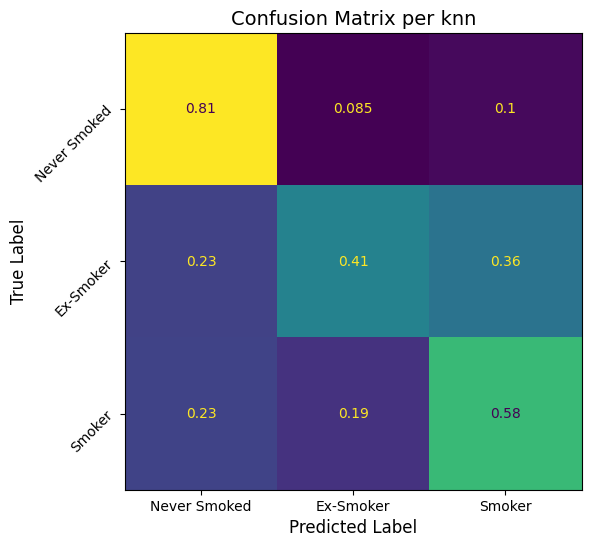

In [15]:
for name, pipeline in pipelines.items():
    y_pred_smoke = pipeline.predict(X_test_s)

    report_smoke = classification_report(y_test_s, y_pred_smoke)

    print(f"Classification report per {name}:")
    print(report_smoke)

    plot_confusion_matrix(y_test_s, y_pred_smoke, ["Never Smoked", "Ex-Smoker", "Smoker"], f"Confusion Matrix per {name}")